In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# Importing Data of COVID19

In [5]:
covid = pd.read_csv("covid.csv", sep=",")

In [13]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,25/09/2020,25,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.571957
1,24/09/2020,24,9,2020,25,5,Afghanistan,AF,AFG,38041757.0,Asia,1.645560
2,23/09/2020,23,9,2020,71,2,Afghanistan,AF,AFG,38041757.0,Asia,1.642931
3,22/09/2020,22,9,2020,30,3,Afghanistan,AF,AFG,38041757.0,Asia,1.524640
4,21/09/2020,21,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.698134
...,...,...,...,...,...,...,...,...,...,...,...,...
44967,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
44968,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
44969,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
44970,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [14]:
covid.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

# Top 20 countries with the most covid deaths

In [7]:
covid.groupby("countriesAndTerritories").deaths.sum().sort_values()[-20:]

countriesAndTerritories
Canada                        9249
Germany                       9443
Belgium                       9965
Indonesia                    10105
Ecuador                      11213
Chile                        12469
Argentina                    14766
South_Africa                 16283
Russia                       19948
Colombia                     24924
Iran                         25015
Spain                        31118
France                       31511
Peru                         31938
Italy                        35781
United_Kingdom               41902
Mexico                       75439
India                        92290
Brazil                      139808
United_States_of_America    202810
Name: deaths, dtype: int64

# Number of deaths per month in France

In [8]:
covid[(covid.countriesAndTerritories=="France")].groupby(["year","month"]).deaths.sum()

year  month
2019  12           0
2020  1            0
      2            2
      3         3022
      4        21063
      5         4684
      6         1042
      7          441
      8          352
      9          905
Name: deaths, dtype: int64

# The average number of deaths per day for each month in europe

In [9]:
covid[covid.continentExp=="Europe"].groupby(["year","month"]).deaths.mean()

year  month
2019  12        0.000000
2020  1         0.000000
      2         0.026437
      3        20.889888
      4        65.056790
      5        23.246117
      6         9.878395
      7         6.429510
      8         6.027479
      9         8.489993
Name: deaths, dtype: float64

# Top 10 european countries with the most covid cases

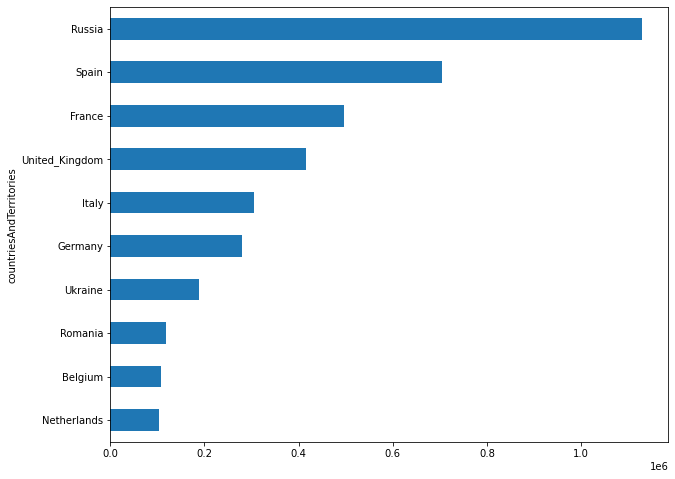

In [30]:
covid[covid.continentExp=="Europe"].groupby("countriesAndTerritories").cases.sum().sort_values()[-10:].plot(kind="barh", figsize=(10,8))

# Number of cases per continent

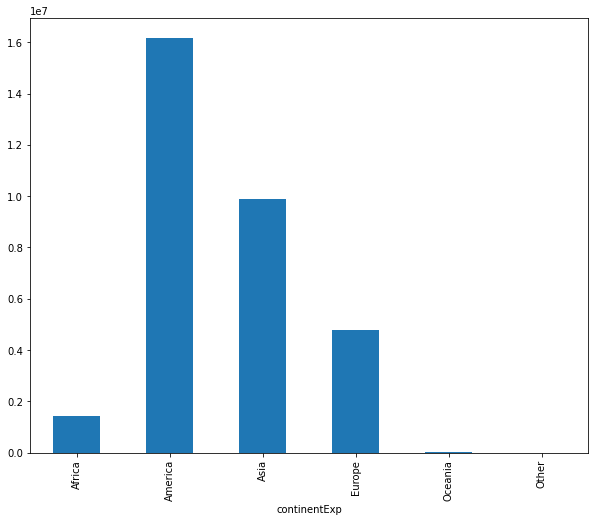

In [66]:
covid.groupby("continentExp").cases.sum().plot(kind="bar", figsize=(10,8))

# Evolution of covid cases in the world since 1st March

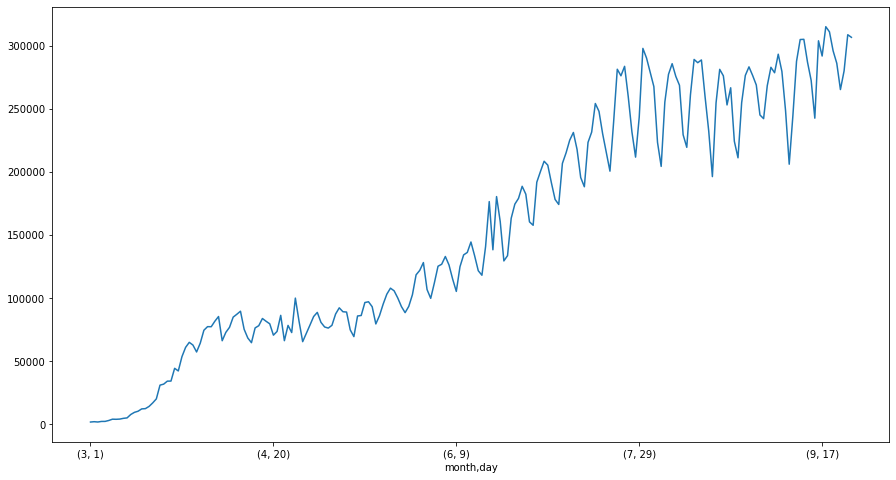

In [65]:
covid2020=covid[covid.year==2020]
covid2020[covid2020.month>2].groupby(["month","day"]).cases.sum().plot(figsize=(15,8))